In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline

In [7]:
df_crashes = pd.read_csv('Traffic_Crashes_-_Crashes_20240830.csv', low_memory=False)
df_crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19.0,3.0,9.0,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18.0,6.0,9.0,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14.0,7.0,7.0,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30.0,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23.0,4.0,8.0,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15.0,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12.0,6.0,8.0,NaN,NaN,NaN


In [ ]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63768 entries, 0 to 63767
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_RECORD_ID           63768 non-null  object 
 1   POSTED_SPEED_LIMIT        63768 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE    63768 non-null  object 
 3   DEVICE_CONDITION          63768 non-null  object 
 4   WEATHER_CONDITION         63768 non-null  object 
 5   LIGHTING_CONDITION        63768 non-null  object 
 6   FIRST_CRASH_TYPE          63768 non-null  object 
 7   TRAFFICWAY_TYPE           63768 non-null  object 
 8   ROAD_DEFECT               63768 non-null  int64  
 9   INTERSECTION_RELATED_I    63768 non-null  int64  
 10  NOT_RIGHT_OF_WAY_I        63768 non-null  int64  
 11  HIT_AND_RUN_I             63768 non-null  int64  
 12  PRIM_CONTRIBUTORY_CAUSE   63768 non-null  object 
 13  DOORING_I                 63768 non-null  int64  
 14  WORK_Z

In [ ]:
data = df_crashes.drop(columns = ['CRASH_RECORD_ID'])

In [ ]:
# Establish predictor and result variables
X = data.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)  
y = data['PRIM_CONTRIBUTORY_CAUSE'] 

In [ ]:
data_dummies = pd.get_dummies(X)

In [ ]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63768 entries, 0 to 63767
Data columns (total 64 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   POSTED_SPEED_LIMIT                                63768 non-null  int64  
 1   ROAD_DEFECT                                       63768 non-null  int64  
 2   INTERSECTION_RELATED_I                            63768 non-null  int64  
 3   NOT_RIGHT_OF_WAY_I                                63768 non-null  int64  
 4   HIT_AND_RUN_I                                     63768 non-null  int64  
 5   DOORING_I                                         63768 non-null  int64  
 6   WORK_ZONE_I                                       63768 non-null  int64  
 7   WORKERS_PRESENT_I                                 63768 non-null  int64  
 8   NUM_UNITS                                         63768 non-null  int64  
 9   INJURIES_TOTAL   

In [ ]:
data_dummies.head()

,POSTED_SPEED_LIMIT,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DOORING_I,WORK_ZONE_I,WORKERS_PRESENT_I,NUM_UNITS,INJURIES_TOTAL,...,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_TRAFFIC ROUTE,MOST_SEVERE_INJURY_FATAL,MOST_SEVERE_INJURY_MAJOR INJURIES,MOST_SEVERE_INJURY_MINOR INJURIES,MOST_SEVERE_INJURY_NO INJURY,DAMAGE_DOLLARS_500 OR LESS,DAMAGE_DOLLARS_501 THRU 1500,DAMAGE_DOLLARS_OVER 1500
0,20,0,0,0,0,0,0,0,2,0.0,...,0,0,0,0,0,0,1,1,0,0
1,30,0,0,0,0,0,0,0,2,0.0,...,0,0,0,0,0,0,1,0,0,1
2,30,0,0,0,1,0,0,0,2,0.0,...,0,0,0,0,0,0,1,0,1,0
3,35,0,1,0,0,0,0,0,2,0.0,...,0,0,0,0,0,0,1,0,1,0
4,30,0,0,0,0,0,0,0,2,1.0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
data_dummies.columns

Index(['POSTED_SPEED_LIMIT', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORKERS_PRESENT_I', 'NUM_UNITS', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'ALIGNMENT_STRAIGHT', 'ROADWAY_SURFACE_COND_DRY',
       'CRASH_TYPE_NO_INJURY', 'TRAFFIC_CONTROL_DEVICE_NO CONTROLS',
       'TRAFFIC_CONTROL_DEVICE_OTHER', 'TRAFFIC_CONTROL_DEVICE_SIGN',
       'TRAFFIC_CONTROL_DEVICE_SIGNAL',
       'DEVICE_CONDITION_FUNCTIONING IMPROPERLY/ MISSING',
       'DEVICE_CONDITION_FUNCTIONING PROPERLY', 'DEVICE_CONDITION_NO CONTROLS',
       'WEATHER_CONDITION_CLEAR', 'WEATHER_CONDITION_OTHER',
       'WEATHER_CONDITION_PRECIPITATION', 'LIGHTING_CONDITION_DARKNESS',
       'LIGHTING_CONDITION_LIGHT', 'LIGHTING_CONDITION_SOME LIGHT',
       'FIRST_CRASH_TYPE_ANGLE', 'FIRST_CRASH_TYPE_HEAD ON',
       'FIRST_CRASH_TYPE_OTHER NONCOLLISION', 'FIRST_CRASH_TYPE_OVERTURNED',


# Model 1 - K- Nearest Neighbors

In [ ]:
# Create a train-test split of the data, with 25% of the data set aside for testing
X_train, X_test, y_train, y_test = train_test_split(data_dummies, y, test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_dummies)
# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_train.head()

,POSTED_SPEED_LIMIT,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DOORING_I,WORK_ZONE_I,WORKERS_PRESENT_I,NUM_UNITS,INJURIES_TOTAL,...,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_TRAFFIC ROUTE,MOST_SEVERE_INJURY_FATAL,MOST_SEVERE_INJURY_MAJOR INJURIES,MOST_SEVERE_INJURY_MINOR INJURIES,MOST_SEVERE_INJURY_NO INJURY,DAMAGE_DOLLARS_500 OR LESS,DAMAGE_DOLLARS_501 THRU 1500,DAMAGE_DOLLARS_OVER 1500
0,0.197149,-0.133869,-0.642103,-0.202729,1.879128,-0.042443,-0.069363,-0.041443,-0.123347,-0.390369,...,-0.236090,-0.060078,-0.041189,-0.034845,-0.15386,-0.427605,0.466805,-0.363285,-0.586896,0.770947
1,0.197149,-0.133869,1.557383,-0.202729,-0.532162,-0.042443,-0.069363,-0.041443,-0.123347,-0.390369,...,-0.236090,-0.060078,-0.041189,-0.034845,-0.15386,-0.427605,0.466805,-0.363285,-0.586896,0.770947
2,-2.590304,-0.133869,-0.642103,-0.202729,1.879128,-0.042443,-0.069363,-0.041443,-0.123347,-0.390369,...,-0.236090,-0.060078,-0.041189,-0.034845,-0.15386,-0.427605,0.466805,-0.363285,-0.586896,0.770947
3,0.197149,-0.133869,-0.642103,4.932704,-0.532162,-0.042443,-0.069363,-0.041443,-0.123347,-0.390369,...,4.235681,-0.060078,-0.041189,-0.034845,-0.15386,-0.427605,0.466805,-0.363285,1.703880,-1.297106
4,0.197149,-0.133869,-0.642103,-0.202729,-0.532162,-0.042443,-0.069363,-0.041443,-0.123347,-0.390369,...,-0.236090,-0.060078,-0.041189,-0.034845,-0.15386,-0.427605,0.466805,-0.363285,-0.586896,0.770947


In [ ]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [ ]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average= 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds,average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds,average= 'weighted')))
    
print_metrics(y_test, test_preds)

Precision Score: 0.615843398341419
Recall Score: 0.6305356918830761
Accuracy Score: 0.6305356918830761
F1 Score: 0.619466223665974


In [ ]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=10):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds,average= 'weighted')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [ ]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 9
F1-Score: 0.6389041195035063


In [ ]:
X_train = scaled_data_train
X_test = scaled_data_test

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 9)

# Fit the classifier
clf.fit(X_train, y_train)

# Predict on the test set
test_preds = clf.predict(X_test)

In [ ]:
print_metrics(y_test, test_preds)

Precision Score: 0.6353906909847924
Recall Score: 0.6553130096600176
Accuracy Score: 0.6553130096600176
F1 Score: 0.6389041195035063


<Figure size 720x720 with 0 Axes>

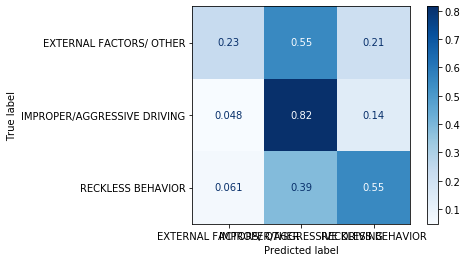

In [ ]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(clf, X_test, y_test,
                     cmap=plt.cm.Blues,normalize='true')
plt.show()

# Model 2 - Decision Trees

In [ ]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=42)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)  

In [ ]:
print_metrics(y_test, y_pred)

Precision Score: 0.5679878216732228
Recall Score: 0.5646719357671559
Accuracy Score: 0.5646719357671559
F1 Score: 0.566277272302482
